In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

import sys
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import matplotlib_funs as mpf
import graph_funs as grf
import numerical_funs as nf
import general_funs as gef
import optics_funs as of
# import finesse3_funs as f3f
import LCT_funs as lctf

# import finesse
# import finesse.ligo as aligo

import networkx as nx
import gwinc

In [5]:
lowpass = lambda x: scipy.ndimage.gaussian_filter(x, 3, mode='nearest')

In [222]:
freq = np.geomspace(1, 10e3, 15000)
# freq=None

In [223]:
aLIGO_budget = gwinc.load_budget('aLIGO', freq=freq)
aLIGO_trace = aLIGO_budget.run()

Aplus_budget = gwinc.load_budget('Aplus', freq=freq)
Aplus_trace = Aplus_budget.run()

Voyager_budget = gwinc.load_budget('Voyager', freq=freq)
Voyager_trace = Voyager_budget.run()

CE1_budget = gwinc.load_budget('CE1', freq=freq)
CE1_trace = CE1_budget.run()

CE2silica_budget = gwinc.load_budget('CE2silica', freq=freq)
CE2silica_trace = CE2silica_budget.run()

CE2silicon_budget = gwinc.load_budget('CE2silicon', freq=freq)
CE2silicon_trace = CE2silicon_budget.run()

traces = [aLIGO_trace, Aplus_trace, Voyager_trace, CE1_trace, CE2silicon_trace]

In [264]:
NEMO_total = np.loadtxt('NEMO_total_sensitivity.csv', delimiter=', ').T
ET_D_total = np.loadtxt('ET-D_total_sensitivity.csv', delimiter=', ').T

/home/alexei/git/alexei_thesis/notebooks/introduction/../ifo_total_strain_sensitivities.png
/home/alexei/git/alexei_thesis/notebooks/introduction/../ifo_total_strain_sensitivities.pdf


0

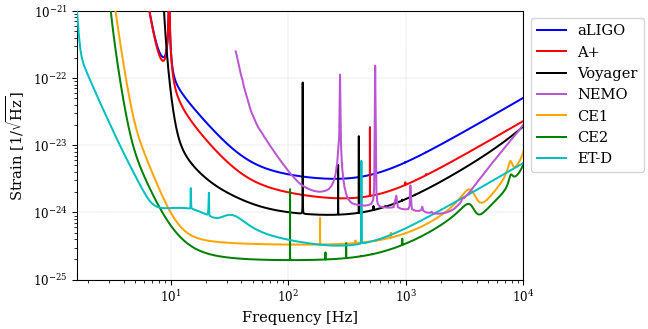

In [269]:
fig,ax = plt.subplots()
plt.loglog(traces[0].freq, traces[0].asd, label='aLIGO', zorder=10)
plt.loglog(traces[1].freq, traces[1].asd, label='A+', zorder=11)
plt.loglog(traces[2].freq, traces[2].asd, label='Voyager', zorder=12)
plt.loglog(*NEMO_total, label='NEMO', c='mediumorchid', zorder=50)
plt.loglog(traces[3].freq, traces[3].asd, label='CE1', zorder=13)
plt.loglog(traces[4].freq, traces[4].asd, label='CE2', zorder=14)
plt.loglog(*ET_D_total, zorder=15, label='ET-D')
plt.ylim([1e-25, 1e-21])
plt.xlim([1.6, 1e4])
mpf.outer_legend()
plt.ylabel('Strain [1/$\sqrt{\mathrm{Hz}}$]')
plt.xlabel('Frequency [Hz]')
mpf.thesis_savefig(fig, '../ifo_total_strain_sensitivities', resize=False)

In [251]:
NEMO_quantum = np.loadtxt('nemo_quantum.csv', delimiter=', ').T
fit_5 = np.polyfit(np.log10(NEMO_quantum[0,:10]), np.log10(NEMO_quantum[1,:10]), deg=1)
NEMO_at_5 = np.array([[5, 10**(np.log10(5)*fit_5[0] + fit_5[1])]]).T

fit_10k = np.polyfit(np.log10(NEMO_quantum[0,-10:]), np.log10(NEMO_quantum[1,-10:]), deg=1)
NEMO_at_10k = np.array([[10e3, 10**(np.polyval(fit_10k, np.log10(10e3)))]]).T
NEMO_quantum = np.hstack([NEMO_at_5, NEMO_quantum, NEMO_at_10k])

In [252]:
ET_D_quantum_LF = np.loadtxt('ET-D_quantum_LF.csv', delimiter=', ').T
ET_D_quantum_HF = np.loadtxt('ET-D_quantum_HF.csv', delimiter=', ').T


ET_D_quantum_HF[0,-1] = 1e4
ET_D_quantum_HF[1,-1] = 5.3e-24
ET_D_quantum_LF = ET_D_quantum_LF[:,ET_D_quantum_LF[0] > 4]

In [253]:
quantum_traces = []
for trace in traces:
    quantum_trace = trace.budget[0]
    quantum_traces.append(quantum_trace)
qtrc = quantum_traces

/home/alexei/git/alexei_thesis/notebooks/introduction/../ifo_quantum_strain_sensitivities.png
/home/alexei/git/alexei_thesis/notebooks/introduction/../ifo_quantum_strain_sensitivities.pdf


0

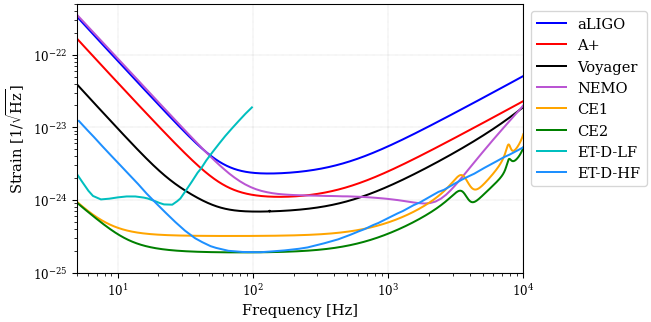

In [267]:
fig,ax = plt.subplots()
plt.loglog(qtrc[0].freq, qtrc[0].asd, label='aLIGO')
plt.loglog(qtrc[1].freq, qtrc[1].asd, label='A+')
plt.loglog(qtrc[2].freq, qtrc[2].asd, label='Voyager')
plt.loglog(*NEMO_quantum, label='NEMO', c='mediumorchid')
plt.loglog(qtrc[3].freq, qtrc[3].asd, label='CE1')
plt.loglog(qtrc[4].freq, qtrc[4].asd, label='CE2')
plt.loglog(*ET_D_quantum_LF, label='ET-D-LF')
plt.loglog(*ET_D_quantum_HF, c='dodgerblue', label='ET-D-HF')
plt.xlim([5,1e4])
plt.ylim([1e-25, 5e-22])

# plt.legend()
mpf.outer_legend()
plt.ylabel('Strain [1/$\sqrt{\mathrm{Hz}}$]')
plt.xlabel('Frequency [Hz]')
mpf.thesis_savefig(fig, '../ifo_quantum_strain_sensitivities', resize=False)